# Importações e random seed

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
import re

In [37]:
RANDOM_SEED = 42

# Dados

## Carregando os dados

Os dados do **cic_ids_2017** são usados pra treinamento, validação e teste.

Os dados do **test_dataset** e do **infiltration_2018** são usados apenas pra teste.

In [38]:
cic_ids_2017 = pd.read_parquet("data/cic_ids_2017.parquet")
test_dataset = pd.read_parquet("data/test.parquet")
infiltration_2018 = pd.read_parquet("data/infiltration_2018.parquet")

Exibindo o **.info()**

In [39]:
cic_ids_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [40]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59435 entries, 0 to 59434
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  59435 non-null  float32
 1   Flow Duration             59435 non-null  float64
 2   Total Fwd Packets         59435 non-null  float64
 3   Total Backward Packets    59435 non-null  float64
 4   Fwd Packets Length Total  59435 non-null  float64
 5   Bwd Packets Length Total  59435 non-null  float64
 6   Fwd Packet Length Max     59435 non-null  float32
 7   Fwd Packet Length Min     59435 non-null  float32
 8   Fwd Packet Length Mean    59435 non-null  float32
 9   Fwd Packet Length Std     59435 non-null  float32
 10  Bwd Packet Length Max     59435 non-null  float32
 11  Bwd Packet Length Min     59435 non-null  float32
 12  Bwd Packet Length Mean    59435 non-null  float32
 13  Bwd Packet Length Std     59435 non-null  float32
 14  Flow B

In [41]:
infiltration_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127844 entries, 0 to 127843
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  127844 non-null  float64
 1   Flow Duration             127844 non-null  float64
 2   Total Fwd Packets         127844 non-null  float64
 3   Total Backward Packets    127844 non-null  float64
 4   Fwd Packets Length Total  127844 non-null  float64
 5   Bwd Packets Length Total  127844 non-null  float64
 6   Fwd Packet Length Max     127844 non-null  float64
 7   Fwd Packet Length Min     127844 non-null  float64
 8   Fwd Packet Length Mean    127844 non-null  float64
 9   Fwd Packet Length Std     127844 non-null  float64
 10  Bwd Packet Length Max     127844 non-null  float64
 11  Bwd Packet Length Min     127844 non-null  float64
 12  Bwd Packet Length Mean    127844 non-null  float64
 13  Bwd Packet Length Std     127844 non-null  f

## Padronizando e limpando os dados

### Renomeando dataset principal

In [42]:
df = cic_ids_2017

# Limpeza, pra liberar memória
del cic_ids_2017

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

### Renomeando Colunas

Algumas colunas do dataset **cic_ids_2017**(que agora é o datagrama **df**) tem seus nomes iniciados com espaços ou finalizados com espaços, será removido estes espaços não úteis para padronizar o nome das colunas.

In [44]:
def remove_initial_and_ending_spaces(name):
    regex = r'^(?:\s+)?(?P<gp>.+?)(?:\s+)?$'
    mo = re.search(regex, name)
    if mo is not None:
      return mo['gp']
    else:
      print(f'Deu erro em: {name}')
      return name

In [45]:
for col in df.columns:
    df = df.rename({col:remove_initial_and_ending_spaces(col)}, axis='columns')

A coluna de labels dos datagramas **infiltration_2018** e **test_dataset** estão nomeadas como "y" "Y", vamos renomear elas para "Label".

In [46]:
infiltration_2018.rename(columns={'y': 'Label'}, inplace=True)
test_dataset.rename(columns={'Y': 'Label'}, inplace=True)

### Alterando Labels

In [47]:
pd.set_option('display.max_rows', 999)
values_count = df['Label'].value_counts()
print(values_count)

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


Padronizando labels e corrigindo labels redundantes/repetidas ou com caracteres irreconhecíveis.

In [48]:
label_changes = {'infilteration':'Infiltration', 
                 'Infilteration':'Infiltration',  
                 'PortScan':'Port Scan', 
                 'Web Attack � Brute Force':'Web Attack: Brute Force', 
                 'Web Attack � XSS':'Web Attack: XSS', 
                 'Web Attack � Sql Injection':'Web Attack: Sql Injection', 
                 'DoS slowloris':'DoS: Slowloris', 
                 'Benign':'BENIGN', 
                 'DoS Hulk':'DoS: Hulk', 
                 'DoS-Goldeneye':'DoS: GoldenEye', 
                 'DoS GoldenEye':'DoS: GoldenEye', 
                 'DoS Slowhttptest':'DoS: Slowhttptest', 
                 'DoS Slowloris':'DoS: Slowloris', 
                 'portscan':'Port Scan', 
                 'Webattack-bruteforce':'Web Attack: Brute Force', 
                 'Webattack-XSS':'Web Attack: XSS', 
                 'Webattack-SQLi':'Web Attack: SQLi', 
                 'DoS attacks-Hulk':'DoS: Hulk', 
                 'Brute Force -Web':'Web Attack: Brute Force', 
                 'DDoS attacks-LOIC-HTTP':'DDoS: LOIC-HTTP', 
                 'DDoS attack-HOIC':'DDoS: HOIC', 
                 'DDOS attack-LOIC-UDP':'DDoS: LOIC-UDP', 
                 'DoS attacks-SlowHTTPTest':'DoS: SlowHTTPTest', 
                 'DoS attacks-GoldenEye':'DoS: GoldenEye', 
                 'DoS attacks-Slowloris':'DoS: Slowloris', 
                 'SSH-Bruteforce':'Brute Force: SSH', 
                 'FTP-BruteForce':'Brute Force: FTP', 
                 'Brute Force -XSS':'Brute Force-XSS', 
                 'SSH-Patator':'Brute Force: SSH-Patator', 
                 'FTP-Patator':'Brute Force: FTP-Patator', 
                 'DDOS-LOIC-UDP':'DDoS: LOIC-UDP', 
                 'Bot':'Botnet'
                 }

df['Label'] = df['Label'].replace(label_changes)
infiltration_2018['Label'] = infiltration_2018['Label'].replace(label_changes)
test_dataset['Label'] = test_dataset['Label'].replace(label_changes)

Transformando os ataques de "Heartbleed" e "Infiltration" em desconhecidos.

In [49]:
#label_changes_2 = {'Heartbleed':'UNKNOWN', 'Infiltration':'UNKNOWN'}

#test_dataset['Label'] = test_dataset['Label'].replace(label_changes_2)

Resultado:

In [50]:
pd.set_option('display.max_rows', None)
values_count = df['Label'].value_counts()
print(values_count.sort_values())

Label
Heartbleed                        11
Web Attack: Sql Injection         21
Infiltration                      36
Web Attack: XSS                  652
Web Attack: Brute Force         1507
Botnet                          1966
DoS: Slowhttptest               5499
DoS: Slowloris                  5796
Brute Force: SSH-Patator        5897
Brute Force: FTP-Patator        7938
DoS: GoldenEye                 10293
DDoS                          128027
Port Scan                     158930
DoS: Hulk                     231073
BENIGN                       2273097
Name: count, dtype: int64


In [51]:
pd.set_option('display.max_rows', None)
values_count = test_dataset['Label'].value_counts()
print(values_count.sort_values())

Label
Heartbleed         11
Infiltration       36
(D)DOS            584
Port Scan         584
Botnet            584
Brute Force       584
Web Attack        584
BENIGN          56468
Name: count, dtype: int64


### Registros duplicados

In [52]:
pd.set_option('display.max_rows', 10) # Retornando a um valor menor na exibição do Pandas

Exibindo registros duplicados

In [53]:
df[df.duplicated()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2109,80,77,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2257,443,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2749,443,49,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2862,443,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2877,443,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830701,53,179,2,2,46,46,23,23,23.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830725,53,161,2,2,82,114,41,41,41.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830726,53,212,2,2,84,162,42,42,42.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830731,443,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Exibindo os registros não duplicados

In [54]:
df[~df.duplicated()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Descartando registros duplicados, pois eles são redundantes e podem atrapalhar o treinamento.

In [55]:
initial_len = df.shape[0]
df = df.drop_duplicates()
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartadas {initial_len - df.shape[0]} duplicadas')

df = df.reset_index(drop=True) # Resetando index

Tamanho inicial: 2830743, tamanho final 2522362 | Descartadas 308381 duplicadas


Repetindo o mesmo processo com os outros datagramas.

In [56]:
initial_len = infiltration_2018.shape[0]
infiltration_2018 = infiltration_2018.drop_duplicates()
print(f'Tamanho inicial: {initial_len}, tamanho final {infiltration_2018.shape[0]} | Descartadas {initial_len - infiltration_2018.shape[0]} duplicadas')

infiltration_2018 = infiltration_2018.reset_index(drop=True) # Resetando index

Tamanho inicial: 127844, tamanho final 104189 | Descartadas 23655 duplicadas


In [57]:
initial_len = test_dataset.shape[0]
test_dataset = test_dataset.drop_duplicates()
print(f'Tamanho inicial: {initial_len}, tamanho final {test_dataset.shape[0]} | Descartadas {initial_len - test_dataset.shape[0]} duplicadas')

test_dataset = test_dataset.reset_index(drop=True) # Resetando index

Tamanho inicial: 59435, tamanho final 56860 | Descartadas 2575 duplicadas


### Registros com valores nulos ou não finitos

In [58]:
df_columns_isfinite = np.isfinite(df.drop(['Label'], axis='columns')).all(axis=0)
df_columns_isfinite[df_columns_isfinite == False]

Flow Bytes/s      False
Flow Packets/s    False
dtype: bool

In [59]:
df_rows_isfinite = np.isfinite(df.drop(['Label'], axis='columns')).all(axis=1)
inf_indexes = df_rows_isfinite[df_rows_isfinite == False].index
df.iloc[inf_indexes][['Flow Bytes/s', 'Flow Packets/s']]

,Flow Bytes/s,Flow Packets/s
65,inf,inf
1767,inf,inf
1890,inf,inf
3365,inf,inf
6752,NaN,inf
...,...,...
2515917,inf,inf
2517136,inf,inf
2517256,NaN,inf
2517261,inf,inf


In [60]:
df.columns[df.isna().any(axis=0)]

Index(['Flow Bytes/s'], dtype='object')

In [61]:
df[df.isna().any(axis=1)][['Flow Bytes/s']]

,Flow Bytes/s
6752,NaN
14586,NaN
14887,NaN
207571,NaN
235442,NaN
...,...
2444305,NaN
2468086,NaN
2488798,NaN
2503689,NaN


Descartando registros com valores nulos ou não finitos.

In [62]:
# Dropar linhas com valores infinitos em 'Flow Packets/s' e 'Flow Bytes/s'
initial_len = df.shape[0]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartados {initial_len - df.shape[0]} registros com valores NA')

df = df.reset_index(drop=True)

Tamanho inicial: 2522362, tamanho final 2520798 | Descartados 1564 registros com valores NA


Repetindo o mesmo processo com os outros dataframes.

In [63]:
infiltration_2018_columns_isfinite = np.isfinite(infiltration_2018.drop(['Label'], axis='columns')).all(axis=0)
infiltration_2018_columns_isfinite[infiltration_2018_columns_isfinite == False]

Series([], dtype: bool)

In [64]:
infiltration_2018.columns[infiltration_2018.isna().any(axis=0)]

Index([], dtype='object')

In [65]:
test_dataset_columns_isfinite = np.isfinite(test_dataset.drop(['Label'], axis='columns')).all(axis=0)
test_dataset_columns_isfinite[test_dataset_columns_isfinite == False]

Series([], dtype: bool)

In [66]:
infiltration_2018.columns[infiltration_2018.isna().any(axis=0)]

Index([], dtype='object')

Não tinha nenhum valor nulo ou não finito nos outros datagramas.

### Seleção de Features

In [67]:
colunas = test_dataset.columns

for coluna in colunas:
    if coluna not in df.columns:
        print(coluna)

Protocol
Fwd Packets Length Total
Bwd Packets Length Total
Packet Length Min
Packet Length Max
Avg Packet Size
Init Fwd Win Bytes
Init Bwd Win Bytes
Fwd Act Data Packets
Fwd Seg Size Min


**Potocol não está no CIC 2017**

In [68]:
'Protocol' in df.columns

False

In [69]:
test_dataset.drop(['Protocol'], axis='columns', inplace= True)
test_dataset.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'ECE F

In [70]:
colunas = test_dataset.columns

In [71]:
features_dict = {'Total Length of Fwd Packets':   'Fwd Packets Length Total'               ,
'Total Length of Bwd Packets':   'Bwd Packets Length Total'               ,
'Min Packet Length':             'Packet Length Min'       , 
'Max Packet Length':             'Packet Length Max'       ,
'Average Packet Size':           'Avg Packet Size'       ,        
'Init_Win_bytes_forward':        'Init Fwd Win Bytes'           ,
'Init_Win_bytes_backward':       'Init Bwd Win Bytes'           ,
'act_data_pkt_fwd':              'Fwd Act Data Packets'   ,
'min_seg_size_forward':          'Fwd Seg Size Min'       ,
}
df.rename(columns= features_dict, inplace= True)
df = df[colunas]

### Dados após o tratamento

Exibindo o **.describe()**.

In [72]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df.describe(include='all')

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2520798
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095057
mean,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,3.406225e+02,3.765453e+02,1.410707e+06,4.729188e+04,1.446142e+06,3.278153e+06,1.029948e+07,1.704214e+05,1.625184e+07,2.919257e+06,3.668641e+06,1.014294e+07,1.135671e+06,1.111025e+07,2.027734e+06,1.668681e+06,5.260619e+06,1.086111e+06,4.866832e-02,-2.920023e+04,-2.555236e+03,4.085969e+04,6.513513e+03,1.683200e+01,1.063750e+03,1.906548e+02,3.302006e+02,5.457761e+05,3.209539e-02,4.866832e-02,2.721360e-04,2.976085e-01,3.118723e-01,1.013929e-01,2.733261e-04,7.004476e-01,2.124358e+02,6.350497e+01,3.406225e+02,1.028174e+01,6.119359e+02,1.157280e+01,1.814402e+04,7.265614e+03,2.228725e+03,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,NaN
std,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,6.325636e+02,8.810547e+02,2.657084e+07,2.026366e+05,4.683197e+06,8.456754e+06,2.568537e+07,3.014304e+06,3.516638e+07,1.001639e+07,1.014208e+07,2.576650e+07,9.059498e+06,3.022924e+07,9.393386e+06,6.630315

In [73]:
# Limitando a quantidade de linhas e colunas das exibições do pandas
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Exibindo o **.info()**.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 67 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Flow Duration             int64  
 1   Total Fwd Packets         int64  
 2   Total Backward Packets    int64  
 3   Fwd Packets Length Total  int64  
 4   Bwd Packets Length Total  int64  
 5   Fwd Packet Length Max     int64  
 6   Fwd Packet Length Min     int64  
 7   Fwd Packet Length Mean    float64
 8   Fwd Packet Length Std     float64
 9   Bwd Packet Length Max     int64  
 10  Bwd Packet Length Min     int64  
 11  Bwd Packet Length Mean    float64
 12  Bwd Packet Length Std     float64
 13  Flow Bytes/s              float64
 14  Flow Packets/s            float64
 15  Flow IAT Mean             float64
 16  Flow IAT Std              float64
 17  Flow IAT Max              int64  
 18  Flow IAT Min              int64  
 19  Fwd IAT Total             int64  
 20  Fwd IAT Mean            

## Selecionando, dividindo e salvando os dados

### Limitando e selecionando a quantidade de dados maliciosos

Filtrando para sobrar apenas o máximo até 1948 amostras de cada tipo de intrusão, este valor é a menor ocorrência de um tipo de intrusão. 

Selecionando dados de acordo com a imagem:

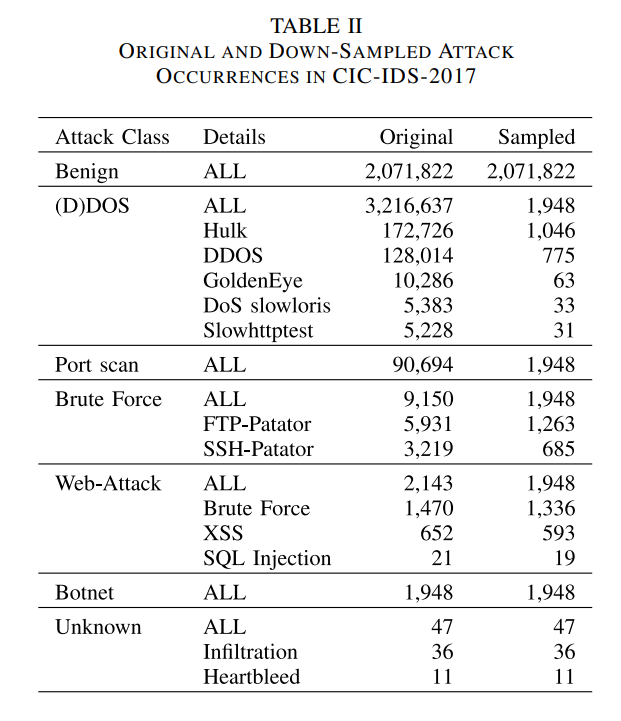

In [75]:
# Definir os limites máximos de linhas para cada valor diferente na coluna 'Label'
limits_per_label = {
    'DoS: Hulk': 1046,
    'Port Scan': 1948,
    'DDoS': 775,
    'DoS: GoldenEye': 63,
    'Brute Force: FTP-Patator': 1263,
    'Brute Force: SSH-Patator': 685,
    'Web Attack: XSS': 593,
    'Web Attack: Sql Injection':  19,
    'Web Attack: Brute Force': 1336,
    'DoS: Slowloris': 33,
    'DoS: Slowhttptest': 31,
    'Botnet': 1948
}

# Criar uma lista vazia para armazenar os DataFrames filtered
dfs_filtered = []
df_temp = df[df['Label'].isin(["BENIGN", "Infiltration", "Heartbleed"])]
dfs_filtered.append(df_temp)

# Iterar sobre os valores únicos na coluna 'Label'
for label_value, limite in limits_per_label.items():
    if label_value not in ["BENIGN", "Infiltration", "Heartbleed"]:
        # Filtrar o DataFrame para o valor específico na coluna 'Label'
        df_value = df[df['Label'] == label_value]
        # Limitar o número de linhas para o valor específico de forma aleatória
        df_value = df_value.sample(n=min(limite, len(df_value)), random_state=RANDOM_SEED)
        # Adicionar o DataFrame filtrado à lista
        dfs_filtered.append(df_value)

# Concatenar os DataFrames filtered
df = pd.concat(dfs_filtered)

# Limpar variáveis não utilizadas
del dfs_filtered

# Verificar se os valores foram limitados corretamente
print(df['Label'].value_counts())

Label
BENIGN                       2095057
Port Scan                       1948
Botnet                          1948
Web Attack: Brute Force         1336
Brute Force: FTP-Patator        1263
                              ...   
Infiltration                      36
DoS: Slowloris                    33
DoS: Slowhttptest                 31
Web Attack: Sql Injection         19
Heartbleed                        11
Name: count, Length: 15, dtype: int64


### Dividindo em treino, validação e teste (benigno e malioso)

Divindo os dados de acordo com a imagem:

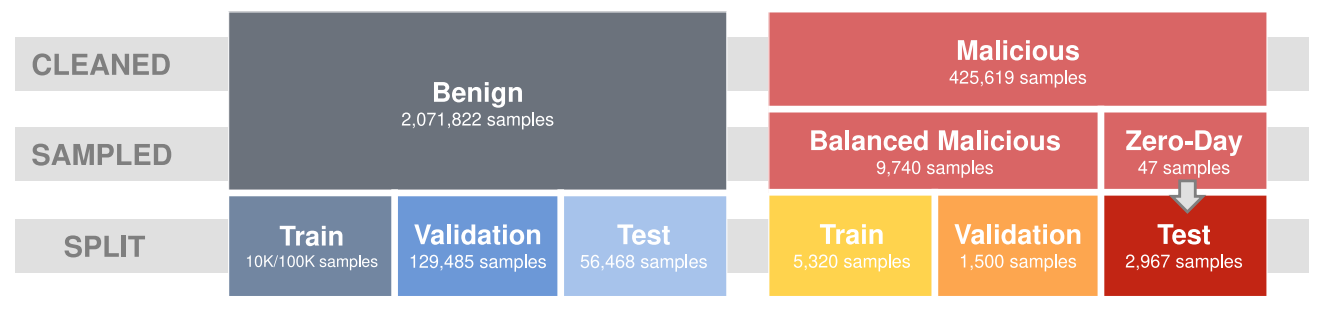

In [76]:
# Filtrar os dados onde a coluna Label seja igual a 'BENIGN'
df_benign = df[df['Label'] == 'BENIGN']
df_benign_origin = df_benign

indexes1 = df_benign.sample(n=100000, replace=False, random_state=RANDOM_SEED).index

df_benign = df_benign.drop(indexes1)

indexes2 = df_benign.sample(n=129485, replace=False, random_state=RANDOM_SEED).index

df_benign = df_benign.drop(indexes2)

indexes3 = df_benign.sample(n=56468, replace=False, random_state=RANDOM_SEED).index

# Remover linhas selecionadas dos dataframes anteriores
train_benign = df_benign_origin.loc[indexes1]
validation_benign = df_benign_origin.loc[indexes2]
test_benign = df_benign_origin.loc[indexes3]

del df_benign_origin

Verificando as divisões dos dados benignos:

In [77]:
label_count = train_benign['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Train: Amount: {amount}')

label_count = validation_benign['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Validation: Amount: {amount}')

label_count = test_benign['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Test: Amount: {amount}')

Train: Amount: 100000
Validation: Amount: 129485
Test: Amount: 56468


In [78]:
warnings.filterwarnings("ignore", message="The behavior of DataFrame concatenation with empty or all-NA entries is deprecated.*") # Ignorar aviso

df_malicious = df[~df['Label'].isin(["BENIGN", "Infiltration", "Heartbleed"])] # Filtrar os dados onde a coluna Label seja diferente de "BENIGN", "Infiltration" e "Heartbleed"

df_malicious_origin = df_malicious

df_malicious_zero_day = df[df['Label'].isin(["Infiltration", "Heartbleed"])]

indexes1 = df_malicious.sample(n=5320, replace=False, random_state=RANDOM_SEED).index

df_malicious = df_malicious.drop(indexes1)

validation_malicious = pd.DataFrame(columns=df.columns)  # DataFrame vazio para armazenar os samples

block_list = list()
dos_list = ["DDoS","DoS: GoldenEye","DoS: Hulk","DoS: Slowloris","DoS: Slowhttptest"]
botnet_list = ["Botnet"]
brute_force_list = ["Brute Force: FTP-Patator", "Brute Force: SSH-Patator"]
web_attack_list = ["Web Attack: XSS", "Web Attack: Sql Injection", "Web Attack: Brute Force"]
port_scan_list = ["Port Scan"]
dos_counter = 0
botnet_counter = 0
brute_force_counter = 0
port_scan_counter = 0
web_attack_counter = 0
# Iterar sobre os valores únicos da coluna 'Label'
while (dos_counter + botnet_counter + brute_force_counter + port_scan_counter + web_attack_counter) < 1500: 
    for label_value in df_malicious['Label'].unique():
        if label_value not in block_list:
            # Selecionar 300 samples para cada valor na coluna 'Label'
            num_sample = (df_malicious['Label'] == label_value).sum()
            index = df_malicious[df_malicious['Label'] == label_value].sample(n=1, replace=False, random_state=RANDOM_SEED).index#, random_state=42)
            df_label = df_malicious_origin.loc[index]
            df_malicious = df_malicious.drop(index)
            validation_malicious = pd.concat([validation_malicious, df_label])

            if label_value in dos_list:
                dos_counter += 1
                if dos_counter == 300:
                    block_list.extend(dos_list[:])
            elif label_value in botnet_list:
                botnet_counter += 1
                if botnet_counter == 300:
                    block_list.extend(botnet_list[:])
            elif label_value in brute_force_list:
                brute_force_counter += 1
                if brute_force_counter == 300:
                    block_list.extend(brute_force_list[:])
            elif label_value in web_attack_list:
                web_attack_counter += 1
                if web_attack_counter == 300:
                    block_list.extend(web_attack_list[:])
            elif label_value in port_scan_list:
                port_scan_counter += 1
                if port_scan_counter == 300:
                    block_list.extend(port_scan_list[:])

len_zero_day = len(df_malicious_zero_day)
indexes3 = df_malicious.sample(n=2967-len_zero_day, replace=False, random_state=RANDOM_SEED).index

# Criar os dataframes
train_malicious = df.loc[indexes1]
test_malicious = df.loc[indexes3]
test_malicious = pd.concat([test_malicious, df_malicious_zero_day])

In [79]:
len(df_malicious)+len(df_malicious_zero_day)

2967

In [80]:
len(validation_malicious)

1500

In [81]:
# Limpeza
del df_malicious_origin
del df_malicious_zero_day

Verificando as divisões dos dados maliciosos:

In [82]:
label_count = train_malicious['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Intrusion: {value}, Amount: {amount}')

Intrusion: Port Scan, Amount: 1066
Intrusion: Botnet, Amount: 1040
Intrusion: Brute Force: FTP-Patator, Amount: 712
Intrusion: Web Attack: Brute Force, Amount: 704
Intrusion: DoS: Hulk, Amount: 602
Intrusion: DDoS, Amount: 402
Intrusion: Brute Force: SSH-Patator, Amount: 388
Intrusion: Web Attack: XSS, Amount: 321
Intrusion: DoS: GoldenEye, Amount: 34
Intrusion: DoS: Slowloris, Amount: 19
Intrusion: DoS: Slowhttptest, Amount: 19
Intrusion: Web Attack: Sql Injection, Amount: 13


In [83]:
label_count = validation_malicious['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Intrusion: {value}, amount: {amount}')


Intrusion: Port Scan, amount: 300
Intrusion: Botnet, amount: 300
Intrusion: Brute Force: FTP-Patator, amount: 150
Intrusion: Brute Force: SSH-Patator, amount: 150
Intrusion: Web Attack: XSS, amount: 147
Intrusion: Web Attack: Brute Force, amount: 147
Intrusion: DoS: Hulk, amount: 123
Intrusion: DDoS, amount: 122
Intrusion: DoS: GoldenEye, amount: 29
Intrusion: DoS: Slowloris, amount: 14
Intrusion: DoS: Slowhttptest, amount: 12
Intrusion: Web Attack: Sql Injection, amount: 6


In [84]:
label_count = test_malicious['Label'].value_counts()

for value, amount in label_count.items():
    print(f'Intrusion: {value}, Amount: {amount}')

Intrusion: Botnet, Amount: 608
Intrusion: Port Scan, Amount: 582
Intrusion: Web Attack: Brute Force, Amount: 485
Intrusion: Brute Force: FTP-Patator, Amount: 401
Intrusion: DoS: Hulk, Amount: 321
Intrusion: DDoS, Amount: 251
Intrusion: Brute Force: SSH-Patator, Amount: 147
Intrusion: Web Attack: XSS, Amount: 125
Intrusion: Infiltration, Amount: 36
Intrusion: Heartbleed, Amount: 11


### Dividindo entre os estágios

Divindo os dados de acordo com a imagem:

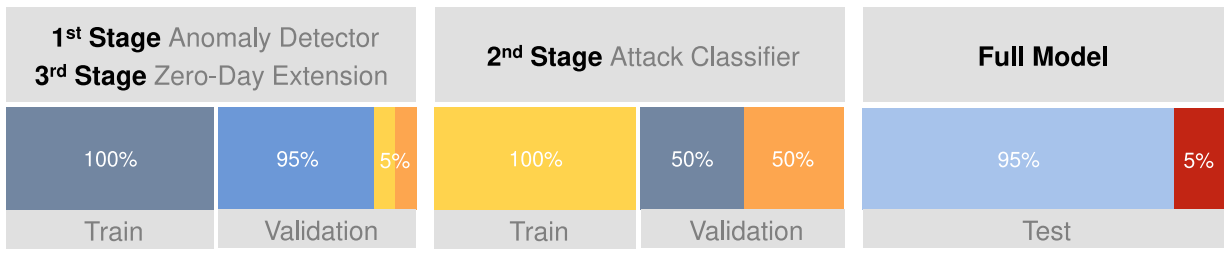

In [85]:
train_stage_1_3 = pd.DataFrame()
validation_stage_1_3 = pd.DataFrame()

train_stage_2 = pd.DataFrame()
validation_stage_2 = pd.DataFrame()

test_full_model = pd.DataFrame()

In [86]:
train_stage_1_3 = train_benign

validation_stage_1_3 = pd.concat([validation_benign, train_malicious, validation_malicious])

train_stage_2 = train_malicious

#30000 = menor quantidade split
_1_validation_stage_2 = train_benign.sample(n= 1500, replace=False, random_state=RANDOM_SEED)
_2_validation_stage_2 = validation_malicious.sample(n= 1500, replace=False, random_state=RANDOM_SEED)
validation_stage_2 = pd.concat([_1_validation_stage_2, _2_validation_stage_2])

test_full_model = pd.concat([train_benign, train_malicious])

### Normalizando os dados

In [87]:
if False:
    stage_1_3_scaler = StandardScaler()
    numeric_cols = train_stage_1_3.select_dtypes(include=['float64', 'int64']).columns
    stage_1_3_scaler.fit(train_stage_1_3[numeric_cols])
    validation_stage_1_3[numeric_cols] = stage_1_3_scaler.transform(validation_stage_1_3[numeric_cols])

    stage_2_scaler = StandardScaler()
    numeric_cols = train_stage_2.select_dtypes(include=['float64', 'int64']).columns
    stage_2_scaler.fit(train_stage_2[numeric_cols])
    validation_stage_2[numeric_cols] = stage_2_scaler.transform(validation_stage_2[numeric_cols])

Criando um datagrama pro treino do 1º estágio com OCSVM

In [88]:
train_stage_1_3_OCSVM = train_stage_1_3.sample(n=int(0.1 * len(train_stage_1_3)), replace=False, random_state=RANDOM_SEED)
train_stage_1_3_AE = train_stage_1_3
del train_stage_1_3

Exibição composição dos datagramas divididos:

In [89]:
train_stage_1_3_OCSVM["Label"].value_counts()

Label
BENIGN    10000
Name: count, dtype: int64

In [90]:
train_stage_1_3_AE["Label"].value_counts()

Label
BENIGN    100000
Name: count, dtype: int64

In [91]:
validation_stage_1_3["Label"].value_counts()

Label
BENIGN                       129485
Port Scan                      1366
Botnet                         1340
Brute Force: FTP-Patator        862
Web Attack: Brute Force         851
                              ...  
Web Attack: XSS                 468
DoS: GoldenEye                   63
DoS: Slowloris                   33
DoS: Slowhttptest                31
Web Attack: Sql Injection        19
Name: count, Length: 13, dtype: int64

In [92]:
train_stage_2["Label"].value_counts()

Label
Port Scan                    1066
Botnet                       1040
Brute Force: FTP-Patator      712
Web Attack: Brute Force       704
DoS: Hulk                     602
                             ... 
Web Attack: XSS               321
DoS: GoldenEye                 34
DoS: Slowloris                 19
DoS: Slowhttptest              19
Web Attack: Sql Injection      13
Name: count, Length: 12, dtype: int64

In [93]:
validation_stage_2["Label"].value_counts()

Label
BENIGN                       1500
Port Scan                     300
Botnet                        300
Brute Force: FTP-Patator      150
Brute Force: SSH-Patator      150
                             ... 
DDoS                          122
DoS: GoldenEye                 29
DoS: Slowloris                 14
DoS: Slowhttptest              12
Web Attack: Sql Injection       6
Name: count, Length: 13, dtype: int64

In [94]:
test_full_model["Label"].value_counts()

Label
BENIGN                       100000
Port Scan                      1066
Botnet                         1040
Brute Force: FTP-Patator        712
Web Attack: Brute Force         704
                              ...  
Web Attack: XSS                 321
DoS: GoldenEye                   34
DoS: Slowloris                   19
DoS: Slowhttptest                19
Web Attack: Sql Injection        13
Name: count, Length: 13, dtype: int64

In [95]:
test_full_model["Label"].value_counts()

Label
BENIGN                       100000
Port Scan                      1066
Botnet                         1040
Brute Force: FTP-Patator        712
Web Attack: Brute Force         704
                              ...  
Web Attack: XSS                 321
DoS: GoldenEye                   34
DoS: Slowloris                   19
DoS: Slowhttptest                19
Web Attack: Sql Injection        13
Name: count, Length: 13, dtype: int64

In [96]:
test_dataset["Label"].value_counts()

Label
BENIGN          54387
(D)DOS            584
Brute Force       584
Web Attack        584
Botnet            477
Port Scan         197
Infiltration       36
Heartbleed         11
Name: count, dtype: int64

### Salvando datagramas em arquivos .csv

In [97]:
train_stage_1_3_AE.to_csv("data/train_stage_1_3_RF.csv")
train_stage_1_3_OCSVM.to_csv("data/train_stage_1_3_OCSVM.csv")
validation_stage_1_3.to_csv("data/validation_stage_1_3.csv")
train_stage_2.to_csv("data/train_stage_2.csv")
validation_stage_2.to_csv("data/validation_stage_2.csv")
test_full_model.to_csv("data/test_full_model.csv")
infiltration_2018.to_csv("data/infiltration_2018.csv")
test_dataset.to_csv("data/test_dataset.csv")

In [98]:
taxonomia_ataque_dict = {
    'BENIGN'                    : 'BENIGN',
    'Port Scan'                 : 'Port Scan',
    'Brute Force: FTP-Patator'  : 'Brute Force',
    'Brute Force: SSH-Patator'  : 'Brute Force',
    'Brute Force'               : 'Brute Force',
    'Web Attack: Brute Force'   : 'Web-Attack' ,
    'Web Attack: XSS'           : 'Web-Attack',
    'Web Attack: Sql Injection' : 'Web-Attack',
    'Web-Attack'                : 'Web-Attack',
    'Web Attack'                : 'Web-Attack',
    '(D)DOS'                    : '(D)DOS',
    'DoS: Hulk'                 : '(D)DOS',
    'DDoS'                      : '(D)DOS',
    'DoS: GoldenEye'            : '(D)DOS',
    'DoS: Slowloris'            : '(D)DOS',
    'DoS: Slowhttptest'         : '(D)DOS',
    'Botnet'                    : 'Botnet',
    'Infiltration'              : 'Unkown',
    'Heartbleed'                : 'Unkown', 
    'Unknown'                   : 'Unknown', 
    'Unkown'                    : 'Unknown',
    } 

def high_level_class(ataque_especifico): 
    return taxonomia_ataque_dict[ataque_especifico]


In [108]:
datasets = [
    train_stage_1_3_AE  ,
    train_stage_1_3_OCSVM,
    validation_stage_1_3 ,
    train_stage_2        ,
    validation_stage_2   ,
    test_full_model      ,
    infiltration_2018    ,
    test_dataset         ,
]
datasets_paths = ["data/train_stage_1_3_RF.csv",
                    "data/train_stage_1_3_OCSVM.csv",
                    "data/validation_stage_1_3.csv",
                    "data/train_stage_2.csv",
                    "data/validation_stage_2.csv",
                    "data/test_full_model.csv",
                    "data/infiltration_2018.csv",
                    "data/test_dataset.csv",]

for dataset, dataset_path in zip(datasets, datasets_paths):
    print(dataset_path)
    print(dataset.shape)
    dataset.Label = dataset.Label.apply(high_level_class)
    dataset.to_csv( dataset_path)

data/train_stage_1_3_RF.csv
(100000, 67)
data/train_stage_1_3_OCSVM.csv
(10000, 67)
data/validation_stage_1_3.csv
(136305, 67)
data/train_stage_2.csv
(5320, 67)
data/validation_stage_2.csv
(3000, 67)
data/test_full_model.csv
(105320, 67)
data/infiltration_2018.csv
(104189, 68)
data/test_dataset.csv
(56860, 67)


### Limpeza de variáveis restantes

In [100]:
del df
del indexes1
del indexes2
del indexes3
del df_benign
del df_malicious
del df_label
del train_benign
del validation_benign
del test_benign
del train_malicious
del validation_malicious
del test_malicious
del block_list
del dos_list
del botnet_list
del brute_force_list
del web_attack_list
del port_scan_list
del dos_counter
del botnet_counter
del brute_force_counter
del port_scan_counter
del web_attack_counter
del _1_validation_stage_2
del _2_validation_stage_2
del label_value
#del dfs_filtered
del df_temp
del df_value